In [3]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

In [4]:
df = pd.read_csv('world_data_full_apply.csv', index_col=0)
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.0,32.49,93.0,Kabul,8.672,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.93911,67.709953,Asia


In [9]:
col_nulos_o = df[df.columns[df.isnull().any()]].select_dtypes(include = 'O').columns

print(col_nulos_o)


Index(['abbreviation', 'capital/major_city', 'currency-code', 'largest_city',
       'official_language', 'continent'],
      dtype='object')


In [10]:
# Prueba en pequeñito.
nulos_abbrev = df['abbreviation'].isnull().sum()/df.shape[0] * 100
nulos_abbrev

np.float64(3.5897435897435894)

In [11]:
# Para saber el % de nulos de cada columna que contiene nulos, hacer bucle for.
for col in col_nulos_o:
    nullxcolumna = round(df[col].isnull().sum() / df.shape[0] * 100, 2)

    print(f'{col}: {nullxcolumna}')

abbreviation: 3.59
capital/major_city: 1.54
currency-code: 7.69
largest_city: 3.08
official_language: 2.56
continent: 0.51


In [12]:
#Este sería para ver los nulos de todo el df.
df.isna().sum()/df.shape[0]*100

country                                  0.000000
density                                  0.000000
abbreviation                             3.589744
agricultural_land                        3.589744
land_area                               15.384615
armed_forces_size                       14.871795
birth_rate                               3.076923
calling_code                             0.512821
capital/major_city                       1.538462
co2-emissions                            6.153846
cpi                                     10.256410
cpi_change                               8.205128
currency-code                            7.692308
fertility_rate                           3.589744
forested_area                            3.589744
gasoline_price                          10.256410
gdp                                      1.025641
gross_primary_education_enrollment       3.589744
gross_tertiary_education_enrollment      6.153846
infant_mortality                         3.076923


In [13]:
lista_columnas_o = ['abbreviation', 'capital/major_city', 'currency-code', 'largest_city',
       'official_language', 'continent']

for col in lista_columnas_o:
    nullxcolumna = round(df[col].isnull().sum() / df.shape[0] * 100, 2)
    #print('--------'*30)
    #for col in lista_columnas_o:
    print(f'% Nulos -- > {col}: {nullxcolumna}')
    display(round(df[col].value_counts()/df.shape[0] * 100, 2))
    print('*********'*30)

% Nulos -- > abbreviation: 3.59


abbreviation
AF    0.51
PY    0.51
NE    0.51
NG    0.51
KP    0.51
      ... 
GR    0.51
GD    0.51
GT    0.51
GN    0.51
ZW    0.51
Name: count, Length: 188, dtype: float64

******************************************************************************************************************************************************************************************************************************************************************************
% Nulos -- > capital/major_city: 1.54


capital/major_city
Kabul                    0.51
Tirana                   0.51
Wellington               0.51
Managua                  0.51
Niamey                   0.51
                         ... 
Athens                   0.51
St. George's, Grenada    0.51
Guatemala City           0.51
Conakry                  0.51
Harare                   0.51
Name: count, Length: 192, dtype: float64

******************************************************************************************************************************************************************************************************************************************************************************
% Nulos -- > currency-code: 7.69


currency-code
EUR    11.79
XOF     4.10
XCD     3.08
USD     3.08
XAF     2.56
       ...  
GMD     0.51
FJD     0.51
ETB     0.51
ERN     0.51
ZMW     0.51
Name: count, Length: 133, dtype: float64

******************************************************************************************************************************************************************************************************************************************************************************
% Nulos -- > largest_city: 3.08


largest_city
S����                    1.03
Panama City              0.51
Managua                  0.51
Niamey                   0.51
Lagos                    0.51
                         ... 
Macedonia                0.51
St. George's, Grenada    0.51
Guatemala City           0.51
Kankan                   0.51
Harare                   0.51
Name: count, Length: 188, dtype: float64

******************************************************************************************************************************************************************************************************************************************************************************
% Nulos -- > official_language: 2.56


official_language
English             15.90
French              12.82
Spanish              9.74
Arabic               9.23
Portuguese           3.59
                    ...  
Albanian             0.51
Jamaican English     0.51
Lao                  0.51
Latvian              0.51
Shona                0.51
Name: count, Length: 76, dtype: float64

******************************************************************************************************************************************************************************************************************************************************************************
% Nulos -- > continent: 0.51


continent
Africa             27.18
Europe             24.10
Asia               23.08
Central America    10.26
Oceania             7.18
South America       6.67
North America       1.03
Name: count, dtype: float64

******************************************************************************************************************************************************************************************************************************************************************************


In [14]:
for columna in lista_columnas_o:
    df[columna] = df[columna].fillna('Unknown')

df[lista_columnas_o].isna().sum()

abbreviation          0
capital/major_city    0
currency-code         0
largest_city          0
official_language     0
continent             0
dtype: int64

HE MODIFICADO TODAS LAS CATEGÓRICAS CON UNKNOWN AUNQUE HAY VARIAS QUE SE PODRÍAN SACAR Y LIMPIAR: abbreviation - rellenar los faltantes con mapa país. Realmente se podría hacer con todas. De cara al ejercicio de evaluación se añadiría como un comentario, no nos ponemos a buscar los mapas para rellenar los huecos. 

In [15]:
df.groupby(['abbreviation'])['country'].sum().reset_index().sample(10)


,abbreviation,country
82,JO,Jordan
117,MV,Maldives
25,BW,Botswana
138,PW,Palau
181,VE,Venezuela
11,BA,Bosnia and Herzegovina
42,DE,Germany
171,TT,Trinidad and Tobago
157,SR,Suriname
187,ZM,Zambia


In [16]:
col_nulos_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns

print(col_nulos_num)

Index(['agricultural_land', 'land_area', 'armed_forces_size', 'birth_rate',
       'calling_code', 'co2-emissions', 'cpi', 'cpi_change', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')


In [25]:
df[col_nulos_num].isnull().sum() / df.shape[0]*100


agricultural_land                        3.589744
land_area                               15.384615
armed_forces_size                       14.871795
birth_rate                               3.076923
calling_code                             0.512821
co2-emissions                            6.153846
cpi                                     10.256410
cpi_change                               8.205128
fertility_rate                           3.589744
forested_area                            3.589744
gasoline_price                          10.256410
gdp                                      1.025641
gross_primary_education_enrollment       3.589744
gross_tertiary_education_enrollment      6.153846
infant_mortality                         3.076923
life_expectancy                          4.102564
maternal_mortality_ratio                 7.179487
minimum_wage                            23.076923
out_of_pocket_health_expenditure         3.589744
physicians_per_thousand                  3.589744


IndexError: index 6 is out of bounds for axis 0 with size 6

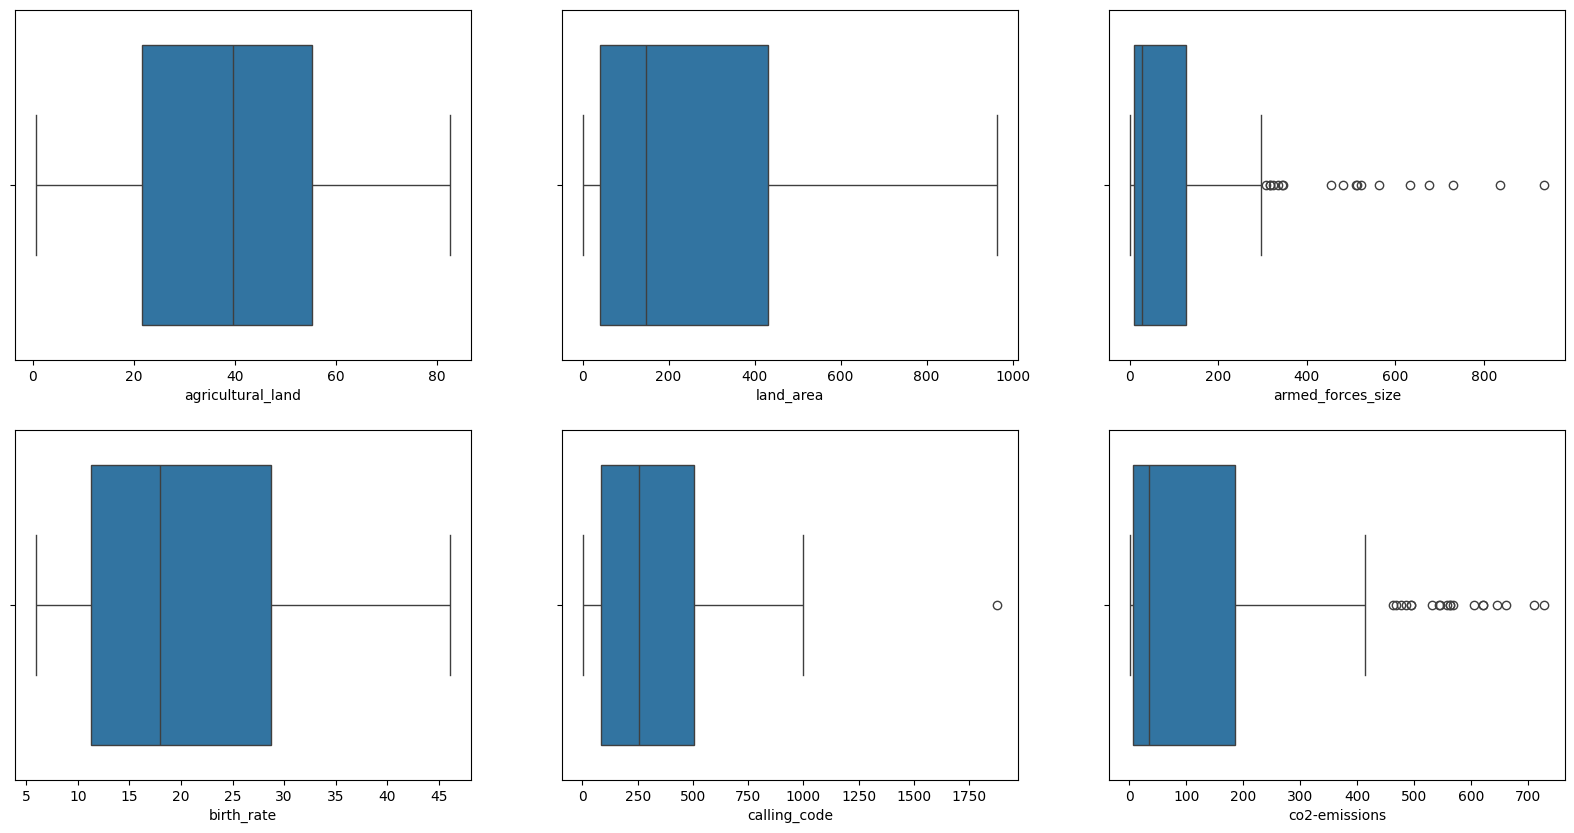

In [26]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(col_nulos_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);